In [60]:
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import pickle

def generate_expansion_configs(config_length, min_expansion, max_expansion):
    values = [i for i in range(min_expansion, max_expansion)]
    result = list(itertools.product(values, repeat=config_length))
    return result

In [132]:
expansion_configs = []
for length in range(2, 4):
    expansion_configs.extend(generate_expansion_configs(length, 2, 6))
kv_sizes = [0, 2, 4, 8, 16, 64, 128]

def construct_data_dict(seq_dict, tree_dict, param):
    data_dict = {}
    for config in expansion_configs:
        data_dict[str(config)] = []
        for kv_size in kv_sizes:
            overall_conf = str(config) + ", " + str(kv_size)
            if (overall_conf in seq_dict):
                diff = seq_dict[overall_conf][param] - tree_dict[overall_conf][param]
                if (param == 0):
                    diff = min(diff, diff) * 1000 # cap at 0.03 and convert to ms
                elif (param == 2):
                    diff = -diff
                data_dict[str(config)].append(diff)
            else:
                data_dict[str(config)].append(0.0)
    return data_dict

In [127]:
# Custom normalization
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        self.autoscale_None(result)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        rescaled = (result - vmin) / (vmax - vmin)  # rescale to [0, 1]
        rescaled = np.ma.masked_where(np.isnan(rescaled), rescaled)
        if midpoint is not None:
            midpoint_rescaled = (midpoint - vmin) / (vmax - vmin)
            rescaled = np.where(rescaled < midpoint_rescaled,
                                0.5 * rescaled / midpoint_rescaled,
                                0.5 + 0.5 * (rescaled - midpoint_rescaled) / (1 - midpoint_rescaled))
        if is_scalar:
            rescaled = rescaled[0]
        return rescaled

In [134]:
from matplotlib.colors import TwoSlopeNorm

def construct_graphs(seq_dict, tree_dict, flash):
    params = {0: "Time", 1: "Memory Usage (GB)", 2: "GPU Utilization"}
    for param in params:
        data_dict = construct_data_dict(seq_dict, tree_dict, param)
        data = np.array(list(data_dict.values())).T
        
        # Create the heat map
        fig, ax = plt.subplots(figsize=(36,8)) 

        # Ensure vmin and vmax are correctly calculated from the data
        vmin = np.min(data)
        vmax = np.max(data)
        midpoint = 0  # Midpoint set to 0 to emphasize negative values
        
        #norm = MidpointNormalize(vmin=np.min(data), vmax=np.max(data), midpoint=0)  # Adjust midpoint as needed
        norm = TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=v)
        cax = ax.matshow(data, cmap='coolwarm', norm = norm)
        
        # Add a colorbar to show the scale
        colorbar = fig.colorbar(cax)
        
        # Set ticks on the colorbar at smaller intervals
        num_ticks = 30  # Number of ticks you want
        ticks = np.linspace(np.min(data), np.max(data), num_ticks)
        colorbar.set_ticks(ticks)
        
        # Increase colorbar font size
        # colorbar.ax.tick_params(labelsize=12)
        
        # Set x and y axis ticks and labels
        ax.set_xticks(np.arange(len(data_dict.keys())))
        ax.set_xticklabels(data_dict.keys(), fontsize=6)
        ax.set_yticks(np.arange(len(kv_sizes)))
        ax.set_yticklabels(kv_sizes)
        
        ax.set_xticks(np.arange(len(data_dict.keys())))
        ax.set_xticklabels(data_dict.keys())
        ax.set_yticks(np.arange(len(kv_sizes)))
        ax.set_yticklabels(kv_sizes)
        
        # Add labels and title
        title = 'Measured '+ params[param]+ ' Difference between Sequential Decoding and Tree Decoding'
        if (flash):
            title += ': W/ Flash'
        else:
            title += ': W/O Flash'
        plt.title(title)
        plt.xticks(rotation=25)
        plt.xlabel('Tree Configs')
        plt.ylabel('KV-Cache Sizes')
        
        # Display the plot
        plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

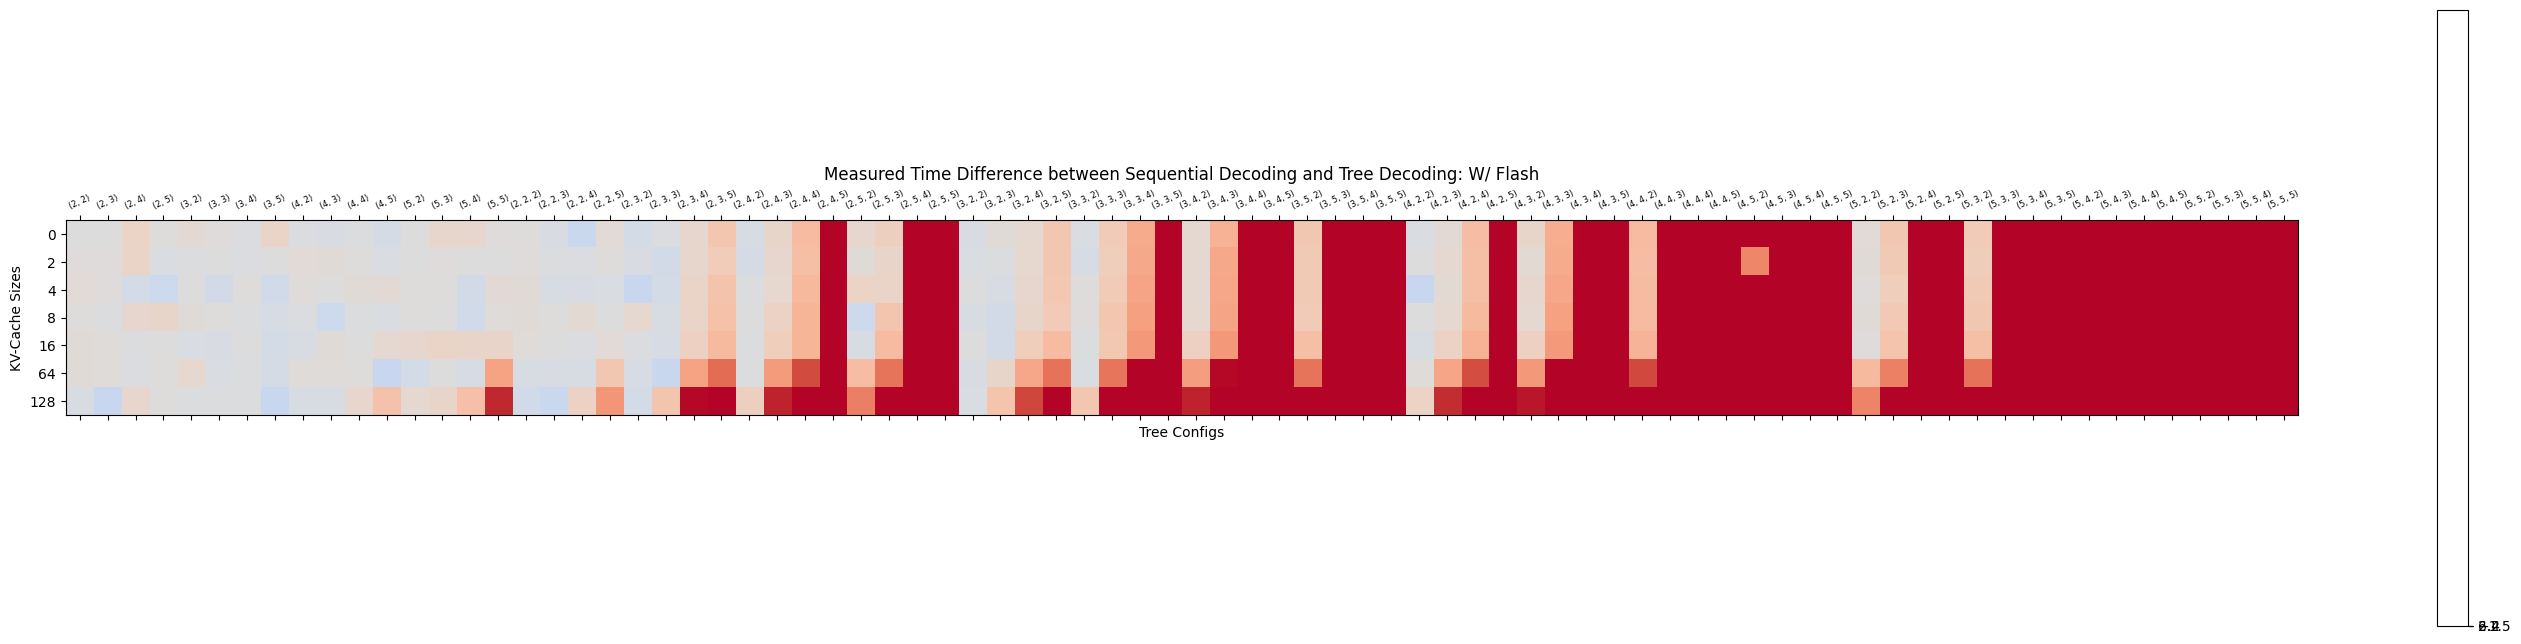

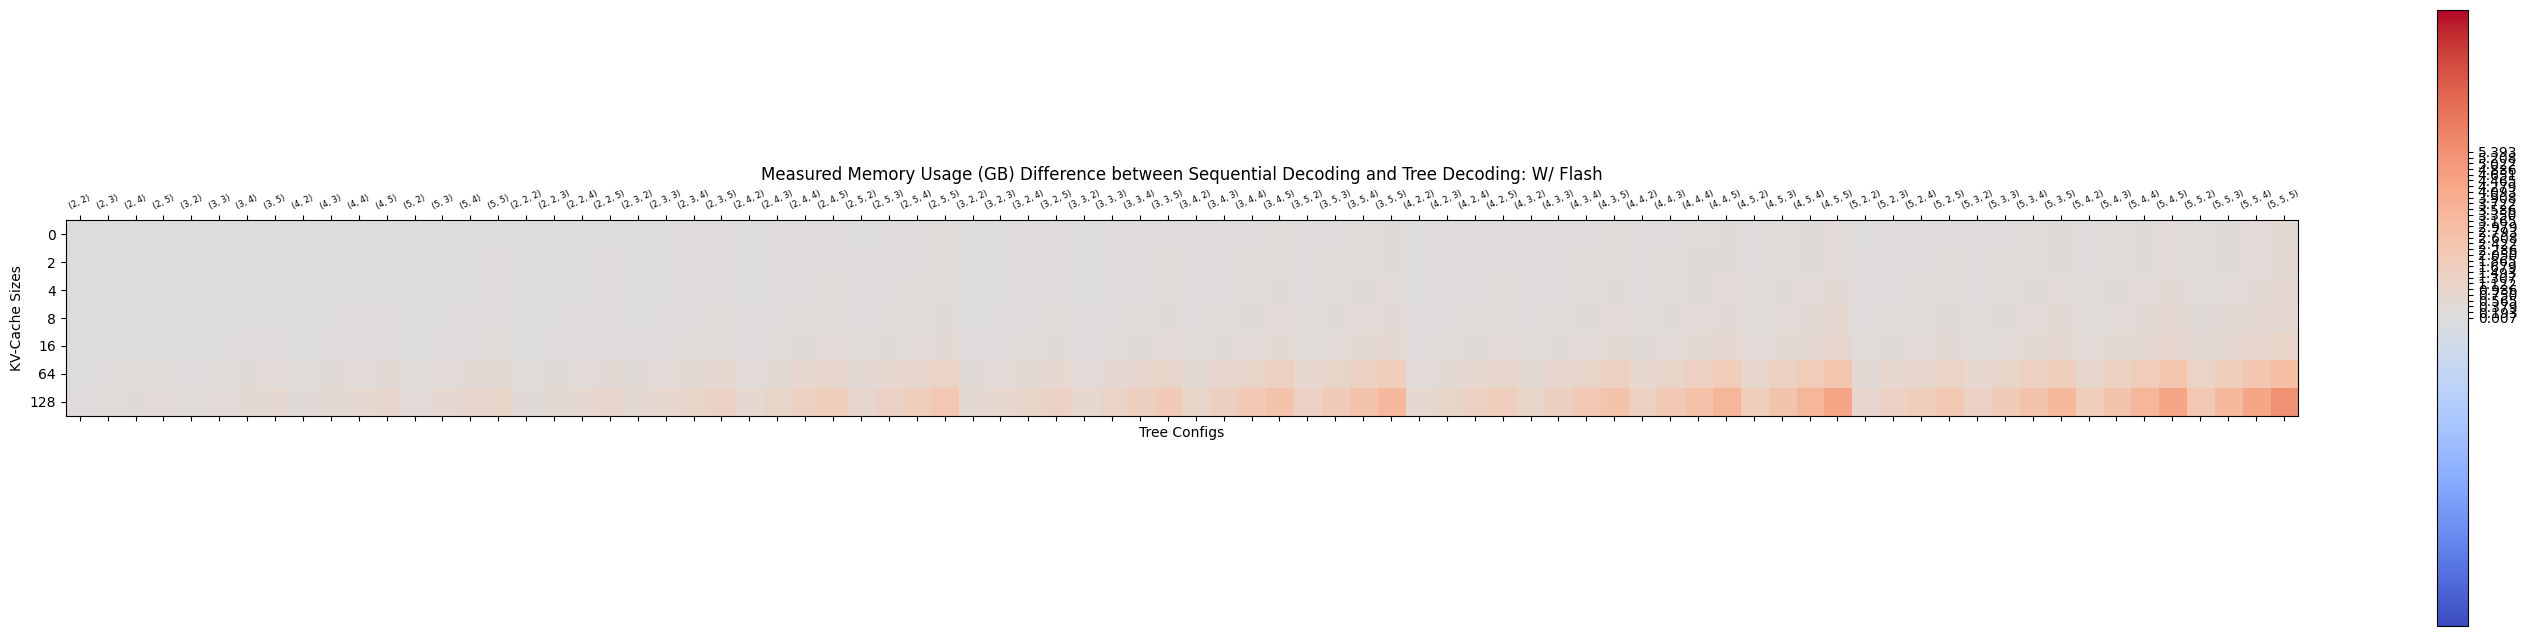

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

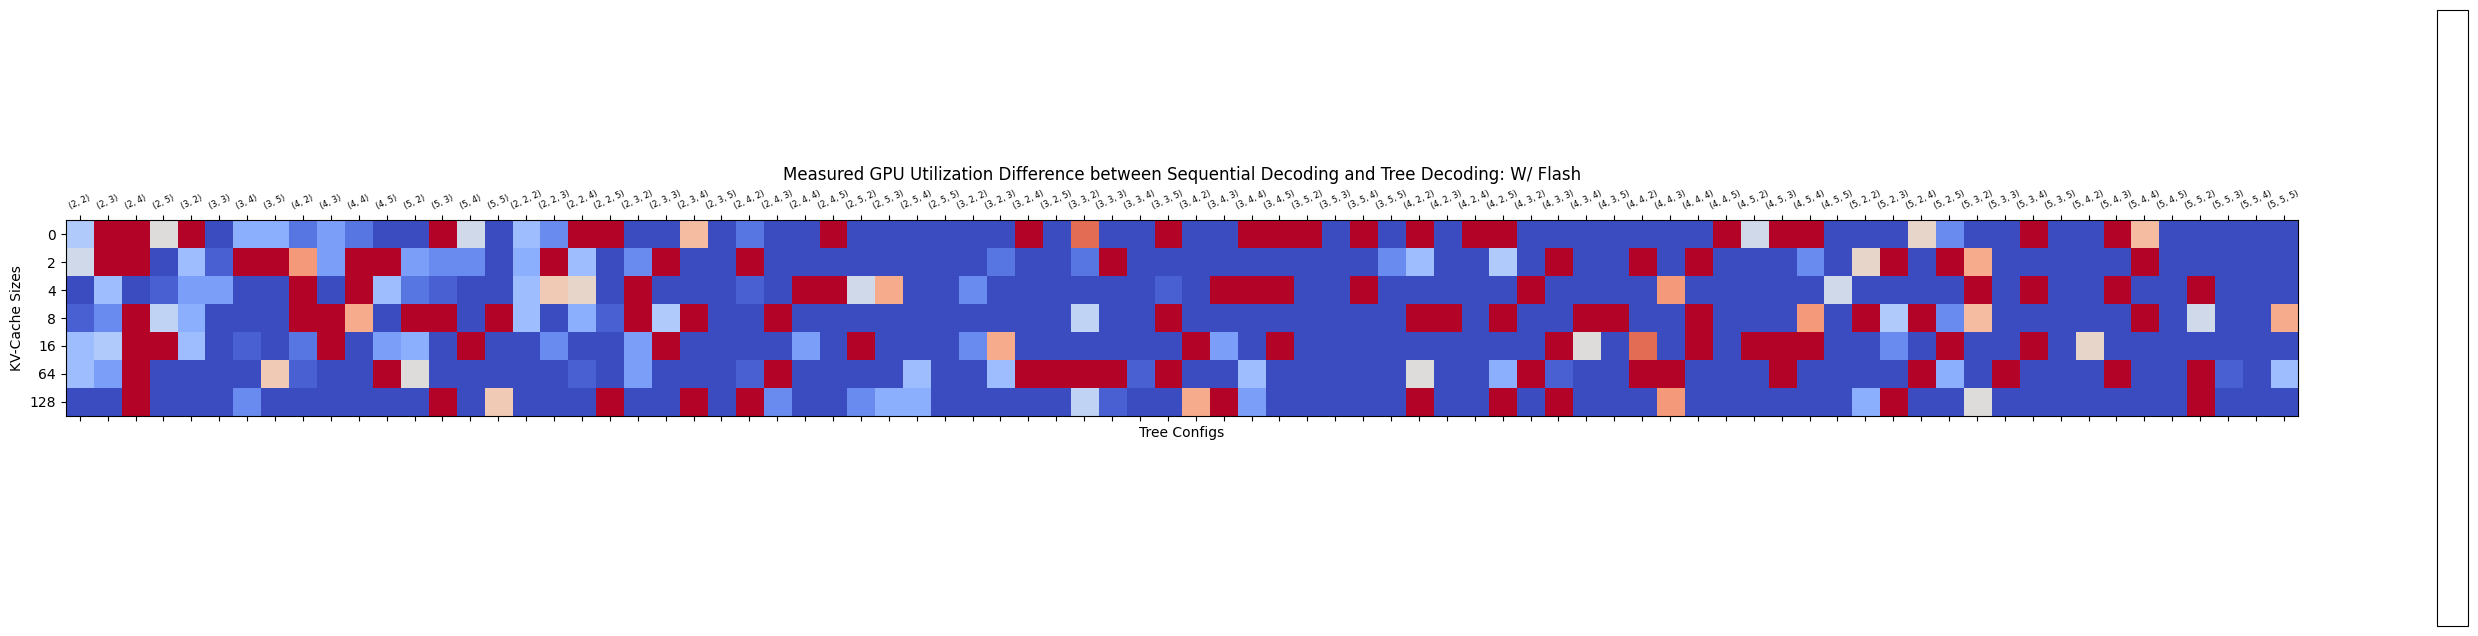

In [133]:
# FLASH GRAPHS
seq_flash = open("sequential_a6000_flash.pkl",'rb')
tree_flash = open("tree_a6000_flash.pkl", 'rb')
seq = pickle.load(seq_flash)
tree = pickle.load(tree_flash)

construct_graphs(seq, tree, True)

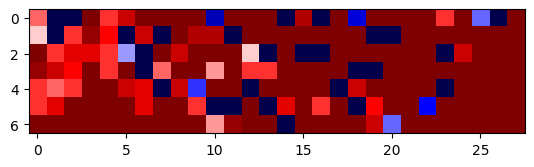

In [135]:
# NO FLASH GRAPHS
seq_no_flash = open("sequential_a6000_no_flash.pkl",'rb')
tree_no_flash = open("tree_a6000_no_flash.pkl", 'rb')
seq = pickle.load(seq_no_flash)
tree = pickle.load(tree_no_flash)

data_dict = construct_data_dict(seq, tree, 0)
np.array(list(data_dict.values())).T
plt.imshow(data, cmap='seismic', interpolation='nearest', vmin=-10, vmax=10)
#construct_graphs(seq, tree, False)